## Setting up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
FOLDER_PATH = 'Colab Notebooks/Pedro-Londono_CW_Folder/'

MODELS_PATH = 'Colab Notebooks/Pedro-Londono_CW_Folder/Models'

GOOGLE_FOLDER_PATH = os.path.join('drive', 'My Drive', FOLDER_PATH)
GOOGLE_MODELS_PATH = os.path.join('drive', 'My Drive', MODELS_PATH)
 
print(os.listdir(GOOGLE_MODELS_PATH))
print(os.listdir(GOOGLE_FOLDER_PATH))


['HOG-SVM.ipynb', 'SVM_Model.py', '__pycache__', 'HOG-BoW-SVM.ipynb', 'SIFT-BoW-SVM.ipynb', 'MLP.ipynb', 'SVC_Alone.ipynb']
['Models', 'CW_Dataset', 'svc_alone.joblib', 'svc_hog.joblib', 'svc_sift.joblib', 'variables', 'assets', 'mlp_arc1.h5', 'test_function.ipynb', 'mlp_arc2.h5']


## Reading the dataset

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
CODE_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'Code')
sys.path.append(CODE_PATH)


In [5]:
import cv2
from skimage import img_as_ubyte, io, color
import numpy as np
import matplotlib.pyplot as plt

DATASET_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'CW_Dataset')
#TRAINING_DATA_PATH = os.path.join(DATASET_PATH, 'train')
#TESTING_DATA_PATH = os.path.join(DATASET_PATH, 'test')
#LABELS_DATA_PATH = os.path.join(DATASET_PATH, 'labels')

#training_data = np.genfromtxt(LABELS_DATA_PATH + 'list_label_train.txt', delimiter=' ')
def load_images_from_folder(path, label_list=None):
  images = []
  labels = []
  img_labels = {}
  if label_list is None:
    folder_names = [folder for folder in sorted(os.listdir(path)) if not folder.startswith('README')]
    print('folder_names', folder_names)
  else:
    folder_names = [folder for folder in sorted(os.listdir(path)) if folder in label_list.endswith('.jpg')]  
  
  for folder in folder_names:
    file_names = [file for file in sorted(os.listdir(os.path.join(path, folder)))]
    print('file_names', file_names)
    for file in file_names:

      if file.endswith('.txt'):
        labels_rd = np.loadtxt(os.path.join(path, folder, file), delimiter=' ', usecols=(1)).tolist()

        [labels.append(label) for label in labels_rd]
        print(labels[:5], len(labels))
        
        print(folder, file, labels)
      else:
        rep_str = '(1)'
        if rep_str not in file:
          images.append(io.imread(os.path.join(path, folder, file)))
        print(folder, file)
  return images, labels



X, y = load_images_from_folder(DATASET_PATH)



Se han truncado las últimas 5000 líneas del flujo de salida.
train train_07288_aligned.jpg
train train_07289_aligned.jpg
train train_07290_aligned.jpg
train train_07291_aligned.jpg
train train_07292_aligned.jpg
train train_07293_aligned.jpg
train train_07294_aligned.jpg
train train_07295_aligned.jpg
train train_07296_aligned.jpg
train train_07297_aligned.jpg
train train_07298_aligned.jpg
train train_07299_aligned.jpg
train train_07300_aligned.jpg
train train_07301_aligned.jpg
train train_07302_aligned.jpg
train train_07303_aligned (1).jpg
train train_07303_aligned.jpg
train train_07304_aligned.jpg
train train_07305_aligned.jpg
train train_07306_aligned.jpg
train train_07307_aligned.jpg
train train_07308_aligned.jpg
train train_07309_aligned.jpg
train train_07310_aligned.jpg
train train_07311_aligned.jpg
train train_07312_aligned.jpg
train train_07313_aligned.jpg
train train_07314_aligned.jpg
train train_07315_aligned.jpg
train train_07316_aligned.jpg
train train_07317_aligned.jpg
train

## Introduction

The RAF dataset contains 15339 aligned facial color images containing expressions and labels for the images, the labels are encoded using ordinal encoding for every emotion. 

### Data
Images are named in the format of "train_XXXXX_aligned.jpg" / "test_XXXX_aligned.jpg".
Images are first roughly aligned using similarity transformation according to the two eye locations and the center of mouth.

Images are then resized to 100*100

#### Label explanation:
1. Surprise<p>
2. Fear<p>
3. Disgust<p>
4. Happiness<p>
5. Sadness
6. Anger
7. Neutral





## Data Preprocessing

Data was preprocessed by converting it to grayscale, at first using colors channels was used, however it was taking to long to train some models such as the SVM model. Using colors the main problem was the curse of dimentionality, even trying to use much less columns. Based on the dataset using color would not give much insight, as to recornise emotions, color probably has less importance. Thus, converting to grayscale reduced the training time. 




(15339, 100, 100, 3) (15339,)


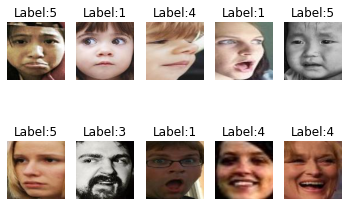

In [31]:
#from sklearn.preprocessing import

def convert_to_numpy(images, labels):
  """Converts the images to a numpy array""" 
  
  data = np.asarray(images)
  lb = np.asarray(labels)
  return data, lb

X, y = convert_to_numpy(X, y)


X = X / 255.
y = y.astype(int)

print(X.shape, y.shape)


#def print_images()
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)
ax = axs.ravel()
for i in range(10):
  ax[i].imshow(X[i, :, :, :])
  ax[i].set_title(f'Label:{y[i]}')
  ax[i].set_axis_off()
plt.show()



In [32]:
from skimage import img_as_ubyte, color
from skimage.transform import rescale, resize


X = img_as_ubyte(color.rgb2gray(X))

X.shape



(15339, 100, 100)

In [33]:
print(X.dtype, y.dtype)
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


uint8 int64
TRAIN: [ 2191  2206  2217 ... 15336 15337 15338] TEST: [   0    1    2 ... 3484 3511 3514]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 2191  2206  2217 ... 13414 13415 13416]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 5171  5172  5173 ... 14055 14056 14057]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 6762  6763  6767 ... 14696 14697 14698]
TRAIN: [    0     1     2 ... 14696 14697 14698] TEST: [ 9498  9499  9500 ... 15336 15337 15338]


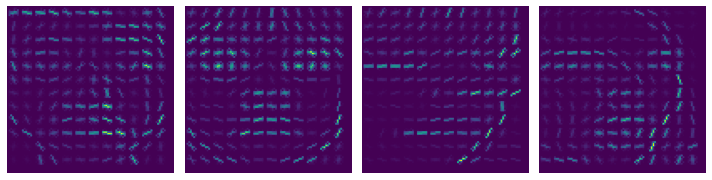

(12272, 1152) (12272, 100, 100)


In [34]:
from skimage.feature import hog

HOG_des_list = []
HOG_images_list = []

fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)


for i in range(len(X_train)):
    HOG_des, HOG_image = hog(X_train[i, :, :], orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)  
 
 
    # Show results for first 4 images
    if i<4:   
        ax[i].imshow(HOG_image)
        ax[i].set_axis_off()

    if HOG_des is not None:
      HOG_des_list.append(HOG_des)  
      HOG_images_list.append(HOG_image)   
     
      
fig.tight_layout()
plt.show()

HOG_des_list = np.asarray(HOG_des_list)
HOG_images_list = np.asarray(HOG_images_list)


print(HOG_des_list.shape, HOG_images_list.shape)



In [38]:
X_train = HOG_des_list
#image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4),
#                       anti_aliasing=True)


print('X_train shape =', X_train.shape)
print('y_train shape =', y_train.shape)



X_train shape = (12272, 1152)
y_train shape = (12272,)


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
from sklearn.utils.fixes import loguniform


params_distribs = {'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-4, 1e-3),
 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}


svg = SVC(cache_size=400)
rndSearch = RandomizedSearchCV(svg, params_distribs, n_iter=100, random_state=42, verbose=2)


subset_size = 4000


rndSearch.fit(X_train[:subset_size], y_train[:subset_size])
#svg.fit(X_train[:subset_size, :], y_train[:subset_size])
print(rndSearch.best_params_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly, total=  29.9s
[CV] C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.9s remaining:    0.0s


[CV]  C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly, total=  30.1s
[CV] C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly ..
[CV]  C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly, total=  29.9s
[CV] C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly ..
[CV]  C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly, total=  30.2s
[CV] C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly ..
[CV]  C=13.292918943162162, gamma=0.0008927180304353625, kernel=poly, total=  30.1s
[CV] C=218.3096839052459, gamma=0.0003952302325941155, kernel=linear .
[CV]  C=218.3096839052459, gamma=0.0003952302325941155, kernel=linear, total=  21.9s
[CV] C=218.3096839052459, gamma=0.0003952302325941155, kernel=linear .
[CV]  C=218.3096839052459, gamma=0.0003952302325941155, kernel=linear, total=  22.6s
[CV] C=218.3096839052459, gamma=0.0003952302325941155, kernel=linear .
[CV]  C=218.3096839052459, gamma=0.0003952302325941155, kernel=linea

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 204.8min finished


{'C': 93.93743056153981, 'gamma': 0.00037009106769118395, 'kernel': 'sigmoid'}


In [ ]:
from sklearn.svm import SVC

svg = SVC(C=93.93743056153981, gamma=0.00037009106769118395, kernel='sigmoid' , cache_size=400)

subset_size = 4000

svg.fit(X_train, y_train)



SVC(C=93.93743056153981, break_ties=False, cache_size=400, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.00037009106769118395, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

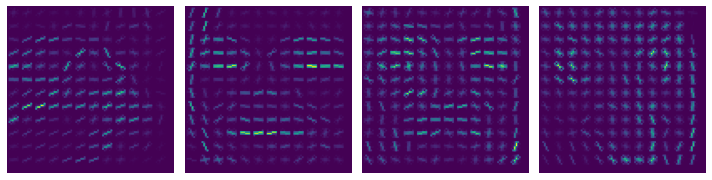

In [41]:
from sklearn.utils import shuffle
from sklearn import metrics
#{'C': 601.0389754773887, 'gamma': 0.00044779271665273756, 'kernel': 'sigmoid'}
#{'C': 93.93743056153981, 'gamma': 0.00037009106769118395, 'kernel': 'sigmoid'}
#predicted = rndSearch.predict(X_test[:subset_size, :])
HOG_des_list = []
HOG_images_list = []


fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)
for i in range(len(X_test)):
    HOG_des, HOG_image = hog(X_test[i, :, :], orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)  
    
    # Show results for first 4 images
    if i<4:   
        ax[i].imshow(HOG_image)
        ax[i].set_axis_off()

    if HOG_des is not None:
      HOG_des_list.append(HOG_des)  
      HOG_images_list.append(HOG_image)   
       
      
fig.tight_layout()
plt.show()

HOG_des_list = np.asarray(HOG_des_list)
HOG_images_list = np.asarray(HOG_images_list)




In [ ]:
X_test = HOG_des_list
predicted = svg.predict(X_test)
print(f"""Classification report for classifier {svg}:
      {metrics.classification_report(y_test, predicted)}\n""")

Classification report for classifier SVC(C=93.93743056153981, break_ties=False, cache_size=400, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.00037009106769118395, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
                    precision    recall  f1-score   support

           1       0.62      0.63      0.63       323
           2       0.84      0.23      0.36        71
           3       0.35      0.18      0.24       175
           4       0.78      0.82      0.80      1192
           5       0.53      0.46      0.49       492
           6       0.62      0.45      0.52       174
           7       0.53      0.68      0.59       640

    accuracy                           0.64      3067
   macro avg       0.61      0.49      0.52      3067
weighted avg       0.64      0.64      0.63      3067




## SVM

Stratified K Fold was used to cross validate the results, the data was splitted into 5 folds. 

To train the model randomised gridsearch was used:
C was chosen from a range of params from 1e-4 to 1e-3. 
gamma was chosen from a range of params from 1e-4 to 1e-3. 
the kerner was chosen from linear, rbf, poly and sigmoid

The parameters were choosen randomly from a normal distribution.

### First Attempt
SVM and Hog as feature descriptor using , at first gave an accuracy of 56%,

the best parameters found were 'C': 601.0389754773887, 'gamma': 0.00044779271665273756, 'kernel': 'sigmoid'.

The training was perform by using a sample of 2000 images

### Second Attempt

SVM and Hog as feature descriptor, gave an accuracy of 64%,

the best parameters found were 'C': 93.93743056153981, 'gamma': 0.00037009106769118395, 'kernel': 'sigmoid'

The hyoerparameter tunning using a sample of 4000 images using 

The training was perform on the whole dataset.  


Confusion matrix:
[[205   0   3  39  14   2  60]
 [ 11  16   2  18  10   8   6]
 [ 12   0  32  34  30  14  53]
 [ 29   1  15 982  51  10 104]
 [ 19   0  13  81 226  11 142]
 [  9   2  10  33  21  78  21]
 [ 44   0  17  68  75   3 433]]


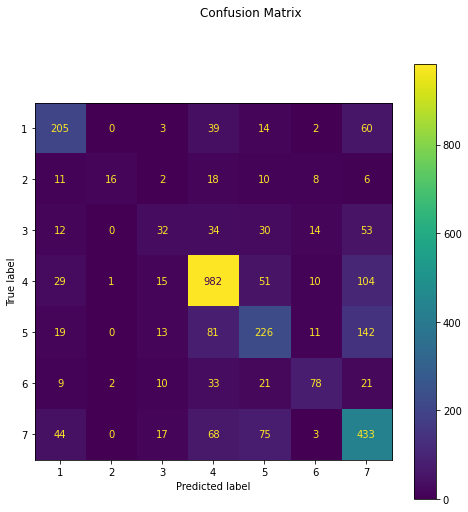

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
#cm = metrics.plot_confusion_matrix(rndSearch, X_train[:sub_size, :], y_test[:sub_size], values_format = 'd', ax=ax)
cm = metrics.plot_confusion_matrix(svg, X_test, y_test, values_format = 'd', ax=ax)
cm.figure_.suptitle("Confusion Matrix")

print(f'Confusion matrix:\n{cm.confusion_matrix}')



In [ ]:
if 7 in y_train[:2500]:
  print(True)
else:
  print(False)


#rndSearch.classes_

True


In [ ]:
from joblib import dump, load


SAVE_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'svc_hog.joblib')
dump(svg, SAVE_PATH) 
load = load(SAVE_PATH)
